## Exercise 1

In [2]:
import os


import geopandas as gpd
from  fiona import listlayers

#maps
turkeyMaps='https://github.com/1IAS21-Tarea/tarea3/raw/main/maps/turkeyMaps_5636.gpkg'
#layers in maps
listlayers(turkeyMaps)

['country', 'cities', 'rivers']

In [3]:
turkey=gpd.read_file(turkeyMaps,layer='country')
turkey_cities=gpd.read_file(turkeyMaps,layer='cities')
turkey_rivers=gpd.read_file(turkeyMaps,layer='rivers')

In [6]:
#they share the same CRS
turkey.crs.to_epsg()==turkey_cities.crs.to_epsg()==turkey_rivers.crs.to_epsg()

True

<Axes: >

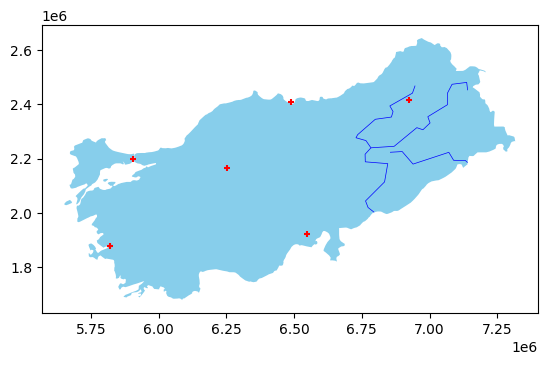

In [9]:
# plotting
base = turkey.plot(facecolor="skyblue")
turkey_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
turkey_cities.plot(marker='+', color='red', markersize=15,ax=base)

#### 1. Check if your country is a polygon or multipolygon.

In [10]:
turkey

,COUNTRY,geometry
0,Turkey,"MULTIPOLYGON (((5732203.788 2108442.488, 57267..."


In [11]:
turkey.boundary

0    MULTILINESTRING ((5732203.788 2108442.488, 572...
dtype: geometry

#### 2. Recover just the boundaries of that country.

<Axes: >

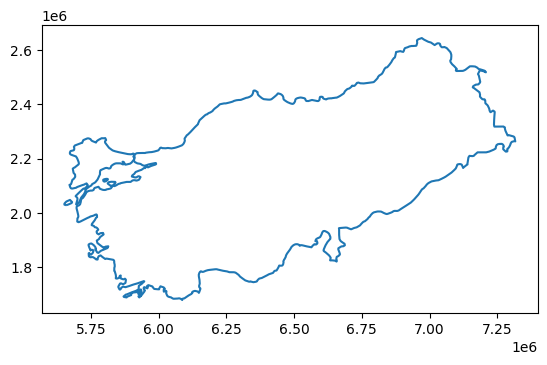

In [12]:
# This is just the borderline
turkey.boundary.plot()

#### 3. Turn the boundary into a GDF

In [13]:
# does 'boundary' return a GDF?
type(turkey.boundary)

geopandas.geoseries.GeoSeries

In [14]:
# converting into GDF
turkey.boundary.to_frame()

,0
0,"MULTILINESTRING ((5732203.788 2108442.488, 572..."


In [15]:
# conversion
turkey_border=turkey.boundary.to_frame() 

# new column (optional)
turkey_border['name']='Turkey' 

# renaming the geometry column
turkey_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
turkey_border = turkey_border.set_geometry("geometry")

# verifying:
turkey_border.crs

<Projected CRS: EPSG:5636>
Name: TUREF / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Türkiye (Turkey) - onshore and offshore.
- bounds: (25.62, 34.42, 44.83, 43.45)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Turkish National Reference Frame
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
turkey_border

,geometry,name
0,"MULTILINESTRING ((5732203.788 2108442.488, 572...",Turkey


In [36]:
#turkey_states=gpd.read_file(os.path.join("maps","Turkey_shapefile","tr_10km.shp"))
#turkey_municipalities=gpd.read_file(os.path.join("maps","Turkey_shapefile","tr_100km.shp"))
turkey_municipalities=gpd.read_file(os.path.join("maps","data","TUR_adm2.shp"))

In [37]:
turkey_states.crs, turkey_municipalities.crs

(<Projected CRS: PROJCS["ETRS89 / ETRS-LAEA",GEOGCS["ETRS89",DATUM[ ...>
 Name: ETRS89 / ETRS-LAEA
 Axis Info [cartesian]:
 - [east]: X (metre)
 - [north]: Y (metre)
 Area of Use:
 - undefined
 Coordinate Operation:
 - name: unnamed
 - method: Lambert Azimuthal Equal Area
 Datum: European Terrestrial Reference System 1989
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

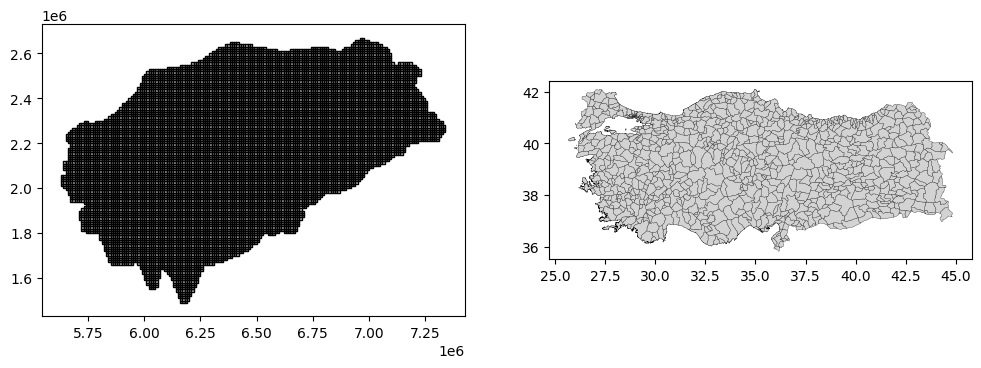

In [38]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

turkey_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
turkey_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)